In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

pd.set_option('display.max_rows', 125)
pd.set_option('display.max_columns', 125)

In [2]:
appln_data = pd.read_csv('appln_data.csv')
prev_appln_data = pd.read_csv('prev_appln_data.csv')

### APPLICATION DATA

In [3]:
appln_data.describe

<bound method NDFrame.describe of         Unnamed: 0.1  Unnamed: 0  SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  \
0                  0           0      100002       1                   0   
1                  1           1      100003       0                   0   
2                  2           2      100004       0                   1   
3                  3           3      100006       0                   0   
4                  4           4      100007       0                   0   
...              ...         ...         ...     ...                 ...   
307506        307506      307506      456251       0                   0   
307507        307507      307507      456252       0                   0   
307508        307508      307508      456253       0                   0   
307509        307509      307509      456254       1                   0   
307510        307510      307510      456255       0                   0   

        CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  C

In [4]:
appln_data.dtypes

Unnamed: 0.1                     int64
Unnamed: 0                       int64
SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE               int64
CODE_GENDER                      int64
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_INCOME_TYPE                 int64
NAME_EDUCATION_TYPE              int64
NAME_FAMILY_STATUS               int64
NAME_HOUSING_TYPE                int64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

#### Lets convert these object type variables to categorical variables | General Rule : N = 0 Y = 1

In [5]:
appln_data['NAME_CONTRACT_TYPE'].value_counts()

0    278232
1     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [6]:
appln_data['FLAG_OWN_REALTY'].value_counts()

1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [7]:
appln_data['FLAG_OWN_CAR'].value_counts()

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64

In [8]:
appln_data['CODE_GENDER'].value_counts()

0    202448
1    105059
2         4
Name: CODE_GENDER, dtype: int64

In [9]:
appln_data = appln_data[appln_data.CODE_GENDER != 2]

In [10]:
appln_data['CODE_GENDER'].value_counts()

0    202448
1    105059
Name: CODE_GENDER, dtype: int64

In [11]:
def encoder(df,col_name):
    enc = preprocessing.LabelEncoder()
    df[col_name] = enc.fit_transform(df[col_name])


In [12]:
# encoder(appln_data, 'NAME_CONTRACT_TYPE')
# encoder(appln_data, 'FLAG_OWN_REALTY')
# encoder(appln_data, 'FLAG_OWN_CAR')
# encoder(appln_data, 'CODE_GENDER')
# encoder(appln_data, 'NAME_CONTRACT_TYPE')
# encoder(appln_data, 'NAME_INCOME_TYPE')
# encoder(appln_data, 'NAME_EDUCATION_TYPE')
# encoder(appln_data, 'NAME_FAMILY_STATUS')
# encoder(appln_data, 'NAME_HOUSING_TYPE')
# encoder(appln_data, 'WEEKDAY_APPR_PROCESS_START')
# encoder(appln_data, 'ORGANIZATION_TYPE')

# Lets check the columns converted to categorical columns.
appln_data.head()

,Unnamed: 0.1,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,0,100002,1,0,1,0,1,0,202500.0,406597.5,7,4,3,1,0.018801,-9461,-637,3648,-2120,1,1,0,1,1,0,2,2,6,10,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,100003,0,0,0,0,0,0,270000.0,1293502.5,4,1,1,1,0.003541,-16765,-1188,1186,-291,1,1,0,1,1,0,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,100004,0,1,1,1,1,0,67500.0,135000.0,7,4,3,1,0.010032,-19046,-225,4260,-2531,1,1,1,1,1,0,2,2,1,9,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,100006,0,0,0,0,1,0,135000.0,312682.5,7,4,0,1,0.008019,-19005,-3039,9833,-2437,1,1,0,1,0,0,2,2,6,17,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,100007,0,0,1,0,1,0,121500.0,513000.0,7,4,3,1,0.028663,-19932,-3038,4311,-3458,1,1,0,1,0,0,2,2,4,11,0,0,0,0,1,1,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
appln_data.dtypes

Unnamed: 0.1                     int64
Unnamed: 0                       int64
SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE               int64
CODE_GENDER                      int64
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
NAME_INCOME_TYPE                 int64
NAME_EDUCATION_TYPE              int64
NAME_FAMILY_STATUS               int64
NAME_HOUSING_TYPE                int64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

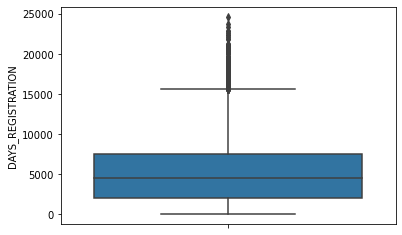

In [14]:
# Check why the data is negative
sns.boxplot(y=appln_data['DAYS_REGISTRATION'])
plt.show()

In [15]:
appln_data['DAYS_REGISTRATION']

0         3648
1         1186
2         4260
3         9833
4         4311
          ... 
307506    8456
307507    4388
307508    6737
307509    2562
307510    5128
Name: DAYS_REGISTRATION, Length: 307507, dtype: int64

appln_data['DAYS_REGISTRATION'] signifies how many days before the application did client change his registration. We can convert this to absolute integer values safely.

In [16]:
appln_data['DAYS_REGISTRATION'] = abs(appln_data['DAYS_REGISTRATION']).astype(int)

C:\Users\saket naik\AppData\Local\Temp\ipykernel_1868\3018324372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appln_data['DAYS_REGISTRATION'] = abs(appln_data['DAYS_REGISTRATION']).astype(int)


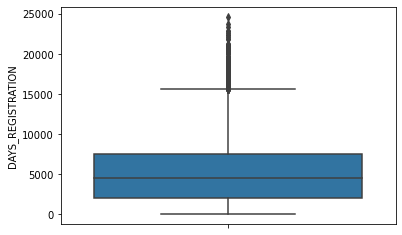

In [17]:
sns.boxplot(y=appln_data['DAYS_REGISTRATION'])
plt.show()

### PREVIOUS APPLICATION DATA

In [18]:
prev_appln_data.describe

<bound method NDFrame.describe of          Unnamed: 0.1  Unnamed: 0  SK_ID_PREV  SK_ID_CURR  NAME_CONTRACT_TYPE  \
0                   0           0     2030495      271877                   1   
1                   1           1     2802425      108129                   0   
2                   2           2     2523466      122040                   0   
3                   3           3     2819243      176158                   0   
4                   4           4     1784265      202054                   0   
...               ...         ...         ...         ...                 ...   
1670209       1670209     1670209     2300464      352015                   1   
1670210       1670210     1670210     2357031      334635                   1   
1670211       1670211     1670211     2659632      249544                   1   
1670212       1670212     1670212     2785582      400317                   0   
1670213       1670213     1670213     2418762      261212                  

In [19]:
prev_appln_data.dtypes

Unnamed: 0.1                     int64
Unnamed: 0                       int64
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE               int64
AMT_APPLICATION                float64
WEEKDAY_APPR_PROCESS_START       int64
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT      int64
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE           int64
NAME_CONTRACT_STATUS             int64
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE                int64
CODE_REJECT_REASON               int64
NAME_CLIENT_TYPE                 int64
NAME_GOODS_CATEGORY              int64
NAME_PORTFOLIO                   int64
NAME_PRODUCT_TYPE                int64
CHANNEL_TYPE                     int64
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY             int64
NAME_YIELD_GROUP                 int64
dtype: object

In [20]:
prev_appln_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

1    1661739
0       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [21]:
prev_appln_data['NAME_CONTRACT_TYPE'].value_counts()

0    747553
1    729151
2    193164
3       346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [22]:
prev_appln_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

5    255118
6    255010
1    253557
0    252048
4    249099
2    240631
3    164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [23]:
prev_appln_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

23    922661
24    677918
20     23765
16     15608
21      8412
6       2888
0       2693
9       2416
14      2174
17      1931
8       1573
13      1239
18      1061
5       1012
22       962
4        865
7        797
10       749
3        533
1        426
11       300
2        136
12        55
15        25
19        15
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [24]:
prev_appln_data['NAME_CONTRACT_STATUS'].value_counts()

0    1036781
1     316319
2     290678
3      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [25]:
prev_appln_data['NAME_PAYMENT_TYPE'].value_counts()

0    1033552
3     627384
2       8193
1       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [26]:
prev_appln_data['CODE_REJECT_REASON'].value_counts()

7    1353093
1     175231
2      55680
3      37467
0      26436
4      12811
8       5244
6       3535
5        717
Name: CODE_REJECT_REASON, dtype: int64

In [27]:
prev_appln_data['SELLERPLACE_AREA'].value_counts()

-1       762675
 0        60523
 50       37401
 30       34423
 20       33840
          ...  
 1014         1
 1256         1
 677          1
 7518         1
 1446         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

In [28]:
# THis column contains mostly values -1 and 0. So this may not be a very good feature, let's drop this column later.

In [29]:
prev_appln_data['NAME_CLIENT_TYPE'].value_counts()

2    1231261
0     301363
1     135649
3       1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [30]:
prev_appln_data['NAME_GOODS_CATEGORY'].value_counts()

27    950809
19    224708
7     121576
5     105769
2      99441
11     53656
22     25021
6      24995
4      23554
3       7381
16      6290
13      5023
17      3843
25      3370
23      2981
12      2668
21      2554
20      2333
24      1659
18      1550
8        446
10       209
0        128
9        107
26        77
15        64
1          1
14         1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [31]:
prev_appln_data['NAME_PORTFOLIO'].value_counts()

3    691011
2    461563
4    372230
0    144985
1       425
Name: NAME_PORTFOLIO, dtype: int64

In [32]:
prev_appln_data['NAME_PRODUCT_TYPE'].value_counts()

0    1063666
2     456287
1     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [33]:
prev_appln_data['CHANNEL_TYPE'].value_counts()

5    719968
4    494690
7    212083
6    108528
3     71297
0     57046
2      6150
1       452
Name: CHANNEL_TYPE, dtype: int64

In [34]:
prev_appln_data['NAME_SELLER_INDUSTRY'].value_counts()

10    855720
4     398265
2     276029
5      57849
3      29781
1      23949
6      19194
0       4990
7       2709
8       1215
9        513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [35]:
prev_appln_data['NAME_YIELD_GROUP'].value_counts()

0    517215
4    385532
1    353331
3    322095
2     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [36]:
# encoder(prev_appln_data, 'NAME_SELLER_INDUSTRY')
# encoder(prev_appln_data, 'CHANNEL_TYPE')
# encoder(prev_appln_data, 'NAME_PRODUCT_TYPE')
# encoder(prev_appln_data, 'NAME_PORTFOLIO')
# encoder(prev_appln_data, 'NAME_GOODS_CATEGORY')
# encoder(prev_appln_data, 'NAME_CLIENT_TYPE')
# encoder(prev_appln_data, 'CODE_REJECT_REASON')
# encoder(prev_appln_data, 'NAME_PAYMENT_TYPE')
# encoder(prev_appln_data, 'NAME_CONTRACT_STATUS')
# encoder(prev_appln_data, 'WEEKDAY_APPR_PROCESS_START')
# encoder(prev_appln_data, 'NAME_CONTRACT_TYPE')
# encoder(prev_appln_data, 'FLAG_LAST_APPL_PER_CONTRACT')
# encoder(prev_appln_data, 'NAME_CASH_LOAN_PURPOSE')
# encoder(prev_appln_data, 'NAME_YIELD_GROUP')

In [37]:
prev_appln_data.dtypes

Unnamed: 0.1                     int64
Unnamed: 0                       int64
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE               int64
AMT_APPLICATION                float64
WEEKDAY_APPR_PROCESS_START       int64
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT      int64
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE           int64
NAME_CONTRACT_STATUS             int64
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE                int64
CODE_REJECT_REASON               int64
NAME_CLIENT_TYPE                 int64
NAME_GOODS_CATEGORY              int64
NAME_PORTFOLIO                   int64
NAME_PRODUCT_TYPE                int64
CHANNEL_TYPE                     int64
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY             int64
NAME_YIELD_GROUP                 int64
dtype: object

In [38]:
merged_data = pd.merge(appln_data, prev_appln_data, how='inner', on='SK_ID_CURR', suffixes=('_appln','_prev_appln'))

In [39]:
merged_data.dtypes

Unnamed: 0.1_appln                         int64
Unnamed: 0_appln                           int64
SK_ID_CURR                                 int64
TARGET                                     int64
NAME_CONTRACT_TYPE_appln                   int64
CODE_GENDER                                int64
FLAG_OWN_CAR                               int64
FLAG_OWN_REALTY                            int64
CNT_CHILDREN                               int64
AMT_INCOME_TOTAL                         float64
AMT_CREDIT                               float64
NAME_INCOME_TYPE                           int64
NAME_EDUCATION_TYPE                        int64
NAME_FAMILY_STATUS                         int64
NAME_HOUSING_TYPE                          int64
REGION_POPULATION_RELATIVE               float64
DAYS_BIRTH                                 int64
DAYS_EMPLOYED                              int64
DAYS_REGISTRATION                          int32
DAYS_ID_PUBLISH                            int64
FLAG_MOBIL          

In [40]:
merged_data.drop(columns=['Unnamed: 0.1_appln', 'Unnamed: 0_appln','Unnamed: 0.1_prev_appln','Unnamed: 0_prev_appln'],inplace=True)

In [41]:
# def correlation(df):
#     corr_matrix = df.corr().abs()
#     upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#     to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
#     print("Original shape: {}".format(df.shape))
#     df.drop(to_drop, axis=1, inplace=True)
#     print("Shape after removing correlated columns: {}".format(df.shape))

In [42]:
# correlation(merged_data)

<AxesSubplot:>

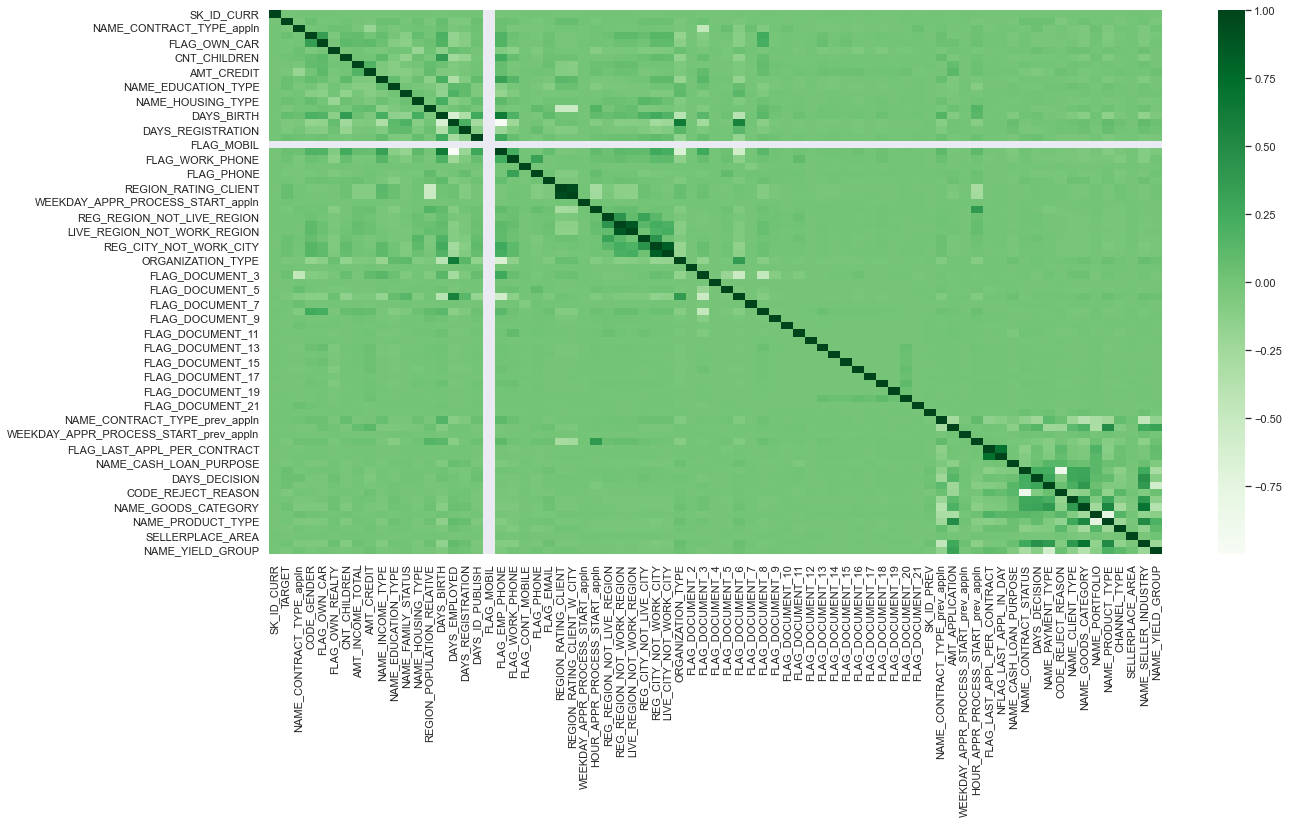

In [43]:
sns.set(rc={'figure.figsize':(20, 10)})
corrmap = merged_data.corr()
sns.heatmap(corrmap, cmap='Greens')

In [44]:
merged_data.drop(columns=['SK_ID_CURR','SK_ID_PREV','SELLERPLACE_AREA'], inplace=True)

In [45]:
merged_data.dtypes

TARGET                                     int64
NAME_CONTRACT_TYPE_appln                   int64
CODE_GENDER                                int64
FLAG_OWN_CAR                               int64
FLAG_OWN_REALTY                            int64
CNT_CHILDREN                               int64
AMT_INCOME_TOTAL                         float64
AMT_CREDIT                               float64
NAME_INCOME_TYPE                           int64
NAME_EDUCATION_TYPE                        int64
NAME_FAMILY_STATUS                         int64
NAME_HOUSING_TYPE                          int64
REGION_POPULATION_RELATIVE               float64
DAYS_BIRTH                                 int64
DAYS_EMPLOYED                              int64
DAYS_REGISTRATION                          int32
DAYS_ID_PUBLISH                            int64
FLAG_MOBIL                                 int64
FLAG_EMP_PHONE                             int64
FLAG_WORK_PHONE                            int64
FLAG_CONT_MOBILE    

In [46]:
merged_data.head()

,TARGET,NAME_CONTRACT_TYPE_appln,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_appln,HOUR_APPR_PROCESS_START_appln,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_prev_appln,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_prev_appln,HOUR_APPR_PROCESS_START_prev_appln,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,1,0,1,0,1,0,202500.0,406597.5,7,4,3,1,0.018801,-9461,-637,3648,-2120,1,1,0,1,1,0,2,2,6,10,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,179055.0,2,9,1,1,23,0,-606,3,7,0,25,3,0,7,0,3
1,0,0,0,0,0,0,270000.0,1293502.5,4,1,1,1,0.003541,-16765,-1188,1186,-291,1,1,0,1,1,0,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900000.0,0,12,1,1,24,0,-746,3,7,2,27,2,2,5,10,3
2,0,0,0,0,0,0,270000.0,1293502.5,4,1,1,1,0.003541,-16765,-1188,1186,-291,1,1,0,1,1,0,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,337500.0,3,17,1,1,23,0,-828,0,7,1,11,3,0,7,5,4
3,0,0,0,0,0,0,270000.0,1293502.5,4,1,1,1,0.003541,-16765,-1188,1186,-291,1,1,0,1,1,0,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,68809.5,2,15,1,1,23,0,-2341,0,7,1,7,3,0,4,4,4
4,0,1,1,1,1,0,67500.0,135000.0,7,4,3,1,0.010032,-19046,-225,4260,-2531,1,1,1,1,1,0,2,2,1,9,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24282.0,0,5,1,1,23,0,-815,0,7,0,19,3,0,6,2,4


In [47]:
merged_data.head()

,TARGET,NAME_CONTRACT_TYPE_appln,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_appln,HOUR_APPR_PROCESS_START_appln,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_prev_appln,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_prev_appln,HOUR_APPR_PROCESS_START_prev_appln,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,1,0,1,0,1,0,202500.0,406597.5,7,4,3,1,0.018801,-9461,-637,3648,-2120,1,1,0,1,1,0,2,2,6,10,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,179055.0,2,9,1,1,23,0,-606,3,7,0,25,3,0,7,0,3
1,0,0,0,0,0,0,270000.0,1293502.5,4,1,1,1,0.003541,-16765,-1188,1186,-291,1,1,0,1,1,0,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900000.0,0,12,1,1,24,0,-746,3,7,2,27,2,2,5,10,3
2,0,0,0,0,0,0,270000.0,1293502.5,4,1,1,1,0.003541,-16765,-1188,1186,-291,1,1,0,1,1,0,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,337500.0,3,17,1,1,23,0,-828,0,7,1,11,3,0,7,5,4
3,0,0,0,0,0,0,270000.0,1293502.5,4,1,1,1,0.003541,-16765,-1188,1186,-291,1,1,0,1,1,0,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,68809.5,2,15,1,1,23,0,-2341,0,7,1,7,3,0,4,4,4
4,0,1,1,1,1,0,67500.0,135000.0,7,4,3,1,0.010032,-19046,-225,4260,-2531,1,1,1,1,1,0,2,2,1,9,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24282.0,0,5,1,1,23,0,-815,0,7,0,19,3,0,6,2,4


In [48]:
loan_default = merged_data[merged_data['TARGET'] == 1]
not_loan_default = merged_data[merged_data['TARGET'] == 0]


In [49]:
loan_default.shape

(122360, 72)

In [50]:
not_loan_default.shape

(1291286, 72)

#### We can perform downsampling to reduce the data size

In [51]:
loan_default_downsampled = resample(loan_default, replace=False, n_samples=10000, random_state=42)
not_loan_default_downsampled = resample(not_loan_default, replace=False, n_samples=10000, random_state=42)


In [52]:
loan_default_downsampled.shape

(10000, 72)

In [53]:
not_loan_default_downsampled.shape

(10000, 72)

In [54]:
df_downsampled = pd.concat([loan_default_downsampled, not_loan_default_downsampled])
len(df_downsampled)

20000

In [55]:
df_downsampled.head()

,TARGET,NAME_CONTRACT_TYPE_appln,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_appln,HOUR_APPR_PROCESS_START_appln,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_prev_appln,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_prev_appln,HOUR_APPR_PROCESS_START_prev_appln,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
37182,1,0,1,0,1,0,180000.0,1008117.0,7,4,1,1,0.018209,-19949,-789,9397,-3346,1,1,0,1,0,0,3,3,0,9,0,0,0,0,0,0,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50742.0,2,10,1,1,23,0,-286,0,7,0,2,3,0,4,4,2
1117042,1,0,1,1,1,1,225000.0,755190.0,7,4,1,1,0.022625,-15345,-4385,2604,-3401,1,1,0,1,0,0,2,2,5,10,0,0,0,0,1,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,4,14,1,1,23,1,-215,3,7,2,27,4,0,5,10,0
870713,1,0,0,0,1,0,112500.0,423000.0,3,1,0,1,0.014520,-23703,365243,7399,-4490,1,0,0,1,0,1,2,2,5,11,0,0,0,0,0,0,57,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26896.5,3,11,1,1,23,0,-2858,0,7,0,19,3,0,4,2,1
351157,1,0,1,1,1,2,315000.0,540000.0,1,2,1,1,0.024610,-11434,-3689,5369,-3687,1,1,1,1,1,0,2,2,5,13,0,0,0,0,0,0,42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,675000.0,6,17,1,1,0,0,-720,3,7,1,27,2,1,3,10,4
1066964,1,0,0,1,0,0,360000.0,729792.0,7,4,1,1,0.008019,-20517,-3731,13531,-4010,1,1,0,1,0,0,2,2,1,11,0,0,0,0,0,0,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3,11,1,1,24,1,-429,3,7,2,27,4,0,5,10,0


In [75]:
df_downsampled.to_csv('downsampled.csv')

In [56]:
features = df_downsampled.drop(columns='TARGET')
features.head()

,NAME_CONTRACT_TYPE_appln,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_appln,HOUR_APPR_PROCESS_START_appln,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_prev_appln,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_prev_appln,HOUR_APPR_PROCESS_START_prev_appln,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
37182,0,1,0,1,0,180000.0,1008117.0,7,4,1,1,0.018209,-19949,-789,9397,-3346,1,1,0,1,0,0,3,3,0,9,0,0,0,0,0,0,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50742.0,2,10,1,1,23,0,-286,0,7,0,2,3,0,4,4,2
1117042,0,1,1,1,1,225000.0,755190.0,7,4,1,1,0.022625,-15345,-4385,2604,-3401,1,1,0,1,0,0,2,2,5,10,0,0,0,0,1,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,4,14,1,1,23,1,-215,3,7,2,27,4,0,5,10,0
870713,0,0,0,1,0,112500.0,423000.0,3,1,0,1,0.014520,-23703,365243,7399,-4490,1,0,0,1,0,1,2,2,5,11,0,0,0,0,0,0,57,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26896.5,3,11,1,1,23,0,-2858,0,7,0,19,3,0,4,2,1
351157,0,1,1,1,2,315000.0,540000.0,1,2,1,1,0.024610,-11434,-3689,5369,-3687,1,1,1,1,1,0,2,2,5,13,0,0,0,0,0,0,42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,675000.0,6,17,1,1,0,0,-720,3,7,1,27,2,1,3,10,4
1066964,0,0,1,0,0,360000.0,729792.0,7,4,1,1,0.008019,-20517,-3731,13531,-4010,1,1,0,1,0,0,2,2,1,11,0,0,0,0,0,0,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3,11,1,1,24,1,-429,3,7,2,27,4,0,5,10,0


In [57]:
target = df_downsampled['TARGET'].copy()
target.head()

37182      1
1117042    1
870713     1
351157     1
1066964    1
Name: TARGET, dtype: int64

In [70]:
features_enc = pd.get_dummies(features, columns = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','CODE_REJECT_REASON',
                                                'NAME_HOUSING_TYPE','NAME_CONTRACT_TYPE_prev_appln','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                                                'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','NAME_PORTFOLIO',
                                                'CODE_REJECT_REASON','NAME_PAYMENT_TYPE', 'WEEKDAY_APPR_PROCESS_START_prev_appln',
                                                  'HOUR_APPR_PROCESS_START_prev_appln','NAME_CASH_LOAN_PURPOSE'])

In [71]:
features_enc.head()

,NAME_CONTRACT_TYPE_appln,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_appln,HOUR_APPR_PROCESS_START_appln,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_APPLICATION,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_INCOME_TYPE_1,NAME_INCOME_TYPE_2,NAME_INCOME_TYPE_3,NAME_INCOME_TYPE_4,NAME_INCOME_TYPE_6,NAME_INCOME_TYPE_7,NAME_EDUCATION_TYPE_0,...,CODE_REJECT_REASON_3,CODE_REJECT_REASON_4,CODE_REJECT_REASON_5,CODE_REJECT_REASON_6,CODE_REJECT_REASON_7,CODE_REJECT_REASON_8,NAME_PAYMENT_TYPE_0,NAME_PAYMENT_TYPE_1,NAME_PAYMENT_TYPE_2,NAME_PAYMENT_TYPE_3,WEEKDAY_APPR_PROCESS_START_prev_appln_0,WEEKDAY_APPR_PROCESS_START_prev_appln_1,WEEKDAY_APPR_PROCESS_START_prev_appln_2,WEEKDAY_APPR_PROCESS_START_prev_appln_3,WEEKDAY_APPR_PROCESS_START_prev_appln_4,WEEKDAY_APPR_PROCESS_START_prev_appln_5,WEEKDAY_APPR_PROCESS_START_prev_appln_6,HOUR_APPR_PROCESS_START_prev_appln_0,HOUR_APPR_PROCESS_START_prev_appln_1,HOUR_APPR_PROCESS_START_prev_appln_2,HOUR_APPR_PROCESS_START_prev_appln_3,HOUR_APPR_PROCESS_START_prev_appln_4,HOUR_APPR_PROCESS_START_prev_appln_5,HOUR_APPR_PROCESS_START_prev_appln_6,HOUR_APPR_PROCESS_START_prev_appln_7,HOUR_APPR_PROCESS_START_prev_appln_8,HOUR_APPR_PROCESS_START_prev_appln_9,HOUR_APPR_PROCESS_START_prev_appln_10,HOUR_APPR_PROCESS_START_prev_appln_11,HOUR_APPR_PROCESS_START_prev_appln_12,HOUR_APPR_PROCESS_START_prev_appln_13,HOUR_APPR_PROCESS_START_prev_appln_14,HOUR_APPR_PROCESS_START_prev_appln_15,HOUR_APPR_PROCESS_START_prev_appln_16,HOUR_APPR_PROCESS_START_prev_appln_17,HOUR_APPR_PROCESS_START_prev_appln_18,HOUR_APPR_PROCESS_START_prev_appln_19,HOUR_APPR_PROCESS_START_prev_appln_20,HOUR_APPR_PROCESS_START_prev_appln_21,HOUR_APPR_PROCESS_START_prev_appln_22,NAME_CASH_LOAN_PURPOSE_0,NAME_CASH_LOAN_PURPOSE_1,NAME_CASH_LOAN_PURPOSE_2,NAME_CASH_LOAN_PURPOSE_3,NAME_CASH_LOAN_PURPOSE_4,NAME_CASH_LOAN_PURPOSE_5,NAME_CASH_LOAN_PURPOSE_6,NAME_CASH_LOAN_PURPOSE_7,NAME_CASH_LOAN_PURPOSE_8,NAME_CASH_LOAN_PURPOSE_9,NAME_CASH_LOAN_PURPOSE_10,NAME_CASH_LOAN_PURPOSE_11,NAME_CASH_LOAN_PURPOSE_13,NAME_CASH_LOAN_PURPOSE_14,NAME_CASH_LOAN_PURPOSE_16,NAME_CASH_LOAN_PURPOSE_17,NAME_CASH_LOAN_PURPOSE_18,NAME_CASH_LOAN_PURPOSE_20,NAME_CASH_LOAN_PURPOSE_21,NAME_CASH_LOAN_PURPOSE_22,NAME_CASH_LOAN_PURPOSE_23,NAME_CASH_LOAN_PURPOSE_24
37182,0,1,0,1,0,180000.0,1008117.0,1,0.018209,-19949,-789,9397,-3346,1,1,0,1,0,0,3,3,0,9,0,0,0,0,0,0,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50742.0,1,1,0,-286,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1117042,0,1,1,1,1,225000.0,755190.0,1,0.022625,-15345,-4385,2604,-3401,1,1,0,1,0,0,2,2,5,10,0,0,0,0,1,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,-215,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
870713,0,0,0,1,0,112500.0,423000.0,0,0.014520,-23703,365243,7399,-4490,1,0,0,1,0,1,2,2,5,11,0,0,0,0,0,0,57,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26896.5,1,1,0,-2858,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
351157,0,1,1,1,2,3150

In [74]:
features.dtypes

NAME_CONTRACT_TYPE_appln                   int64
CODE_GENDER                                int64
FLAG_OWN_CAR                               int64
FLAG_OWN_REALTY                            int64
CNT_CHILDREN                               int64
AMT_INCOME_TOTAL                         float64
AMT_CREDIT                               float64
NAME_INCOME_TYPE                           int64
NAME_EDUCATION_TYPE                        int64
NAME_FAMILY_STATUS                         int64
NAME_HOUSING_TYPE                          int64
REGION_POPULATION_RELATIVE               float64
DAYS_BIRTH                                 int64
DAYS_EMPLOYED                              int64
DAYS_REGISTRATION                          int32
DAYS_ID_PUBLISH                            int64
FLAG_MOBIL                                 int64
FLAG_EMP_PHONE                             int64
FLAG_WORK_PHONE                            int64
FLAG_CONT_MOBILE                           int64
FLAG_PHONE          